# 描述性统计
由于初步清洗之后的数据仍然大大超出内存，所以需要使用dask这个包来处理

In [1]:
import pandas as pd
import numpy as np
import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=4, memory_limit='auto')#四进程四线程并行处理，内存限制设为自动
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 127.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52468,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 127.19 GiB
Comm: tcp://127.0.0.1:52492,Total threads: 4
Dashboard: http://127.0.0.1:52494/status,Memory: 31.80 GiB
Nanny: tcp://127.0.0.1:52474,


In [3]:
data_paths = []
#F:\Russia_Ukraine_Tweets\data_cleaned
for filepath,dirnames,filenames in os.walk(r'F:\Russia_Ukraine_Tweets\data_cleaned'):
    for filename in filenames:
        name = (os.path.join(filepath,filename))
        data_paths.append(name)

In [4]:
data_paths

['F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-22_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-23_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-24_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_1_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_2_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_3_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_4_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_5_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_6_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_7_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-25_8_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_cleaned\\tweet_ids_day_2022-2-26_1_clean.csv',
 'F:\\Russia_Ukraine_Tweets\\data_

In [5]:
df = pd.read_csv(data_paths[0]).set_index('Unnamed: 0')

In [6]:
df.columns

Index(['Datetime', 'Tweet_url', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_conversation_id', 'Tweet_language',
       'Tweet_source', 'Tweet_source_url', 'Tweet_links', 'Tweet_mdeia',
       'Tweet_retweeted_tweet', 'Tweet_quoted_tweet', 'Tweet_inReplyToTweetId',
       'Tweet_inReplyToUser', 'Tweet_mentioned_users', 'Tweet_coordinates',
       'Tweet_place', 'Tweet_hashtags', 'Tweet_cashtags', 'Username',
       'User_displayname', 'User_id', 'User_profile_description',
       'User_description_link', 'User_verified', 'User_created',
       'User_followers_count', 'User_friends_count', 'User_statuses_count',
       'User_favourites_count', 'User_listed_count', 'User_media_count',
       'User_location', 'User_protected', 'User_profile_link',
       'User_profile_image_url', 'User_profile_banner_url', 'User_label',
       'Tweet_isRT'],
      dtype='object')

In [7]:
df.head()

,Datetime,Tweet_url,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_conversation_id,Tweet_language,...,User_favourites_count,User_listed_count,User_media_count,User_location,User_protected,User_profile_link,User_profile_image_url,User_profile_banner_url,User_label,Tweet_isRT
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2022-02-22 11:51:07+00:00,https://twitter.com/HimanRoy14/status/14960901...,1496090169229058054,russian troops enter eastern ukraine russia uk...,0,0,0,0,1496090169229058054,en,...,540,0,364,NaN,False,NaN,https://pbs.twimg.com/profile_images/155873444...,https://pbs.twimg.com/profile_banners/13193120...,NaN,0
1,2022-02-22 11:51:29+00:00,https://twitter.com/srdmk01/status/14960902616...,1496090261650550792,alleged video showing russian military convoy...,0,19,0,0,1496090261650550792,en,...,389794,19,9924,NaN,False,NaN,https://pbs.twimg.com/profile_images/155951041...,https://pbs.twimg.com/profile_banners/25428138...,NaN,1
2,2022-02-22 11:49:44+00:00,https://twitter.com/carlsl/status/149608982245...,1496089822456389633,president vladimir putin told russia s defense...,0,1,0,0,1496089822456389633,en,...,164198,470,8177,DUBAI . UAE.,False,NaN,https://pbs.twimg.com/profile_images/213387991...,https://pbs.twimg.com/profile_banners/81120503...,NaN,1
3,2022-02-22 11:54:47+00:00,https://twitter.com/swabalpro/status/149609109...,1496091094421065729,alleged video showing russian military convoy...,0,19,0,0,1496091094421065729,en,...,266403,0,47,NaN,False,NaN,https://pbs.twimg.com/profile_images/151273608...,https://pbs.twimg.com/profile_banners/13568676...,NaN,1
4,2022-02-22 11:56:48+00:00,https://twitter.com/gosiababa1/status/14960916...,1496091602984521731,psy putina ukraina kaczystan,0,104,0,0,1496091602984521731,en,...,95167,1,527,NaN,False,NaN,https://pbs.twimg.com/profile_images/152989597...,https://pbs.twimg.com/profile_banners/29025631...,NaN,1


In [8]:
df.Datetime.describe()

count                           742
unique                          737
top       2022-02-22 20:59:29+00:00
freq                              2
Name: Datetime, dtype: object

In [10]:
df.loc[1].Datetime[:10]

'2022-02-22'

In [11]:
df.Tweet_isRT.sum()

356

In [12]:
df.Tweet_isRT.count()

742

In [13]:
len(df)

742

In [14]:
counts = []
ret_counts = []
dates = []

for fn in data_paths:
    df = dask.delayed(pd.read_csv)(fn)#使用delayed()实现并行读取csv
    ret_count = df.Tweet_isRT.sum()
    count = df.Tweet_isRT.count()
    date = df.loc[1].Datetime[:10]
    counts.append(count)
    ret_counts.append(ret_count)
    dates.append(date)
        

In [15]:
dates, counts, ret_counts = dask.compute(dates, counts, ret_counts)

In [16]:
sum(counts)

42160342

In [17]:
sum(ret_counts)

32505543

In [18]:
sum(counts)-sum(ret_counts)

9654799

In [19]:
ori_counts = []
for i in range(len(counts)):
    ori_counts.append(counts[i]-ret_counts[i])

In [20]:
dates[:10]

['2022-02-22',
 '2022-02-23',
 '2022-02-24',
 '2022-02-25',
 '2022-02-25',
 '2022-02-25',
 '2022-02-25',
 '2022-02-25',
 '2022-02-25',
 '2022-02-25']

In [21]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')

In [35]:
npd = pd.DataFrame(list(zip(dates, ret_counts, ori_counts)), columns=['date','retweets','original_tweets'])

In [37]:
npd.date = pd.to_datetime(npd.date)

In [38]:
table = pd.pivot_table(npd, index=['date'],values=['retweets','original_tweets'],aggfunc='sum')

In [39]:
table.head(20)

,original_tweets,retweets
date,,
2022-02-22,386,356
2022-02-23,2717,4963
2022-02-24,148554,503294
2022-02-25,281593,1214648
2022-02-26,265964,1333151
2022-02-27,283718,1200385
2022-02-28,333436,905813
2022-03-01,329162,876631
2022-03-02,212419,728841


In [40]:
table.index

DatetimeIndex(['2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03',
               ...
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19',
               '2022-09-20', '2022-09-21'],
              dtype='datetime64[ns]', name='date', length=212, freq=None)

从上面的结果可以看出，一共有42160342条推文，其中9654799条为原创。下面绘制出每天的原创-转发推文堆叠柱形图

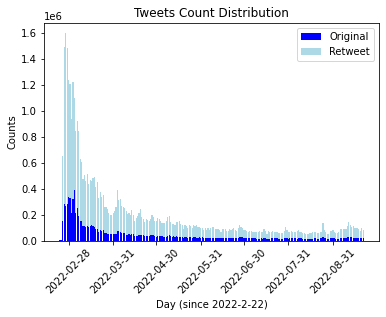

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(table.index[0],table.index[-1],freq='M'),rotation=45)
plt.bar(x=table.index, height=table.original_tweets, label='Original', color='blue')
plt.bar(x=table.index, height=table.retweets, bottom=table.original_tweets, label='Retweet', color='lightblue')
plt.ylabel('Counts')
plt.xlabel('Day (since 2022-2-22)')
plt.title('Tweets Count Distribution')
plt.legend()
plt.savefig('Tweets_Count_Distribution.png', dpi=300)
plt.show()

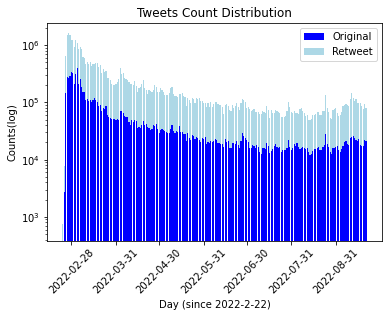

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(table.index[0],table.index[-1],freq='M'),rotation=45)
plt.bar(x=table.index, height=table.original_tweets, label='Original', color='blue')
plt.bar(x=table.index, height=table.retweets, bottom=table.original_tweets, label='Retweet', color='lightblue')
plt.ylabel('Counts(log)')
plt.xlabel('Day (since 2022-2-22)')
plt.yscale('log')#对数坐标
plt.title('Tweets Count Distribution')
plt.legend()
plt.savefig('Tweets_Count_Distribution(log).png', dpi=300)
plt.show()

# 使用MoralStrength+Dask统计Daily Moral Fundation

In [185]:
import moralstrength

In [186]:
df = pd.read_csv(data_paths[1])

In [187]:
texts = df.Tweet_content.tolist()

In [188]:
texts

['introduction to russian swear words putin russia invader dickhead ht ',
 'schindlers list girl in the red coat kinda vibes looking at this clip as its very eerie. ukraine ukraina',
 ' ukraine ukrainerussiacrisis ukrainerussie ukraina',
 'live: putin to announce his recognition of independence of donetsk amp; luhansk separatist republics in donbas in ukr ',
 'live: putin signs russian recognition of independence of donetsk amp; luhansk separatist republics in donbas in ukrai ',
 'current affairs putin ukraine ukrainerussiacrisis ukrainecrisis ukraina putinswar',
 ' index s amp;p500.. below 4200; sell off russiaukrainecrisis stocks banknifty',
 'we have completely dishonored our father, the sins of the originators and slave owners of this country are coming home to roost. all these countries see that and they are about to pounce. may god protect his children. russiaukrainecrisis',
 'current affairs putin ukraine ukrainerussiacrisis ukrainecrisis ukraina putinswar',
 'current affairs pu

In [189]:
from moralstrength.moralstrength import estimate_morals
'''
This package offers a function to perform unsupervised prediction over a list of texts, 
giving the prediction in a organized fashion.

1=Subversion, 9=Authority for AUTHORITY
1=Harm, 9=Care for CARE
1=Proportionality, 9=Fairness for FAIRNESS
1=Disloyalty, 9=Loyalty for LOYALTY
1=Degradation, 9=Purity for PURITY
'''

"""
Wrapper of the texts_morals function. It returns the moral estimation in a
Pandas DataFrame, being the columns the morals, and the rows the different documents.
This should be the method used analyzing text without using any machine learning. It uses
only the annotations of the lexicon.
"""

result = estimate_morals(texts, process=True) # set to false if text is alredy pre-processed
print(result)

D:\Anaconda\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


          care  fairness  loyalty  authority  purity
0          NaN       NaN      NaN        NaN     NaN
1          NaN       NaN      NaN        NaN     NaN
2          NaN       NaN      NaN        NaN     NaN
3          NaN       NaN      NaN        NaN     NaN
4          NaN       NaN      NaN        NaN     NaN
...        ...       ...      ...        ...     ...
7675  1.666667       NaN      NaN        NaN     NaN
7676  2.166667       NaN      NaN        NaN     NaN
7677       NaN       NaN      NaN        NaN     NaN
7678  8.200000       NaN      NaN        NaN     NaN
7679       NaN       NaN      NaN        NaN     NaN

[7680 rows x 5 columns]


In [192]:
result['fairness'].sum()/result['fairness'].count()

7.35637800819485

In [194]:
total_care = []
total_fairness = []
total_loyalty = []
total_authority = []
total_purity = []
care_counts = []
fairness_counts = []
loyalty_counts = []
authority_counts = []
purity_counts = []

In [195]:
#divide the task
serieses = []
series = 0
while series<len(data_paths):
    serieses.append(series)
    series+=5
serieses.append(len(data_paths))
    

In [196]:
serieses

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 287]

In [197]:
for i in range(0,len(serieses)-1):
    client.restart()
    print('task begins from', serieses[i] ,'to', serieses[i+1])
    for fn in data_paths[serieses[i]:serieses[i+1]]:
        df = dask.delayed(pd.read_csv)(fn)
        texts = df.Tweet_content.tolist()
        client.cancel(df) #release ROM
        result = dask.delayed(estimate_morals)(texts, process=True)
        #分别统计每个维度的sum与非空数量，便于后续加总求平均
        care_count = result.care.count()
        care = result.care.sum()
        fairness_count = result.fairness.count()
        fairness = result.fairness.sum()
        loyalty_count = result.loyalty.count()
        loyalty = result.loyalty.sum()
        authority_count = result.authority.count()
        authority = result.authority.sum()
        purity_count = result.purity.count()
        purity = result.purity.sum()
        total_care.append(care)
        total_fairness.append(fairness)
        total_loyalty.append(loyalty)
        total_authority.append(authority)
        total_purity.append(purity)
        care_counts.append(care_count)
        fairness_counts.append(fairness_count)
        loyalty_counts.append(loyalty_count)
        authority_counts.append(authority_count)
        purity_counts.append(purity_count)
    total_care, total_fairness, total_loyalty, total_authority, total_purity, care_counts, fairness_counts, loyalty_counts, authority_counts, purity_counts= dask.compute(
        total_care, total_fairness, total_loyalty, total_authority, total_purity, care_counts, fairness_counts, loyalty_counts, authority_counts, purity_counts)

task begins from 0 to 5
task begins from 5 to 10
task begins from 10 to 15
task begins from 15 to 20
task begins from 20 to 25
task begins from 25 to 30
task begins from 30 to 35
task begins from 35 to 40
task begins from 40 to 45
task begins from 45 to 50
task begins from 50 to 55
task begins from 55 to 60
task begins from 60 to 65


distributed.nanny - WARNING - Worker process still alive after 1.5999986648559572 seconds, killing


task begins from 65 to 70
task begins from 70 to 75
task begins from 75 to 80
task begins from 80 to 85
task begins from 85 to 90
task begins from 90 to 95
task begins from 95 to 100
task begins from 100 to 105
task begins from 105 to 110
task begins from 110 to 115
task begins from 115 to 120
task begins from 120 to 125
task begins from 125 to 130
task begins from 130 to 135
task begins from 135 to 140
task begins from 140 to 145
task begins from 145 to 150
task begins from 150 to 155
task begins from 155 to 160
task begins from 160 to 165
task begins from 165 to 170
task begins from 170 to 175
task begins from 175 to 180
task begins from 180 to 185
task begins from 185 to 190
task begins from 190 to 195
task begins from 195 to 200
task begins from 200 to 205
task begins from 205 to 210
task begins from 210 to 215
task begins from 215 to 220
task begins from 220 to 225
task begins from 225 to 230
task begins from 230 to 235
task begins from 235 to 240
task begins from 240 to 245
task 

In [198]:
len(total_care)

287

In [199]:
mpd = pd.DataFrame(list(zip(dates, counts, total_care, total_fairness, total_loyalty, total_authority, total_purity, care_counts, fairness_counts, loyalty_counts, authority_counts, purity_counts))
                    ,columns=['date','tweets','care', 'fairness', 'loyalty', 'authority', 'purity' ,'care_counts', 'fairness_counts', 'loyalty_counts', 'authority_counts', 'purity_counts'])

In [200]:
mpd

,date,tweets,care,fairness,loyalty,authority,purity,care_counts,fairness_counts,loyalty_counts,authority_counts,purity_counts
0,2022-02-22,742,583.827381,221.330952,423.892262,271.173810,159.440476,145,34,75,50,31
1,2022-02-23,7680,4969.507937,1824.381746,4064.562897,4413.119643,1193.462302,1542,248,764,729,219
2,2022-02-24,651848,687986.963671,221911.394643,528471.630271,462489.125952,240708.423199,216095,30324,78017,84757,38342
3,2022-02-25,204859,207760.776072,58979.043056,190082.916019,195738.529676,59707.091415,68492,8522,28026,31991,9755
4,2022-02-25,194697,224074.111519,43906.947421,138161.007381,193260.287183,49479.017460,70154,6176,20743,30826,7963
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2022-09-05,85433,73212.480317,19675.788294,42049.929861,39756.657705,17994.796230,24283,2903,7123,6780,3120
283,2022-09-06,91341,68820.271587,11998.065873,37054.155159,39642.911786,29888.235317,19995,1816,6419,6682,4119
284,2022-09-07,91881,90131.753929,21232.560119,52602.988095,40109.645503,21112.907738,25680,3355,9185,7055,3234
285,2022-09-08,91547,77243.695913,20317.805357,69273.327315,56415.915079,19057.048214,23403,3167,12830,9906,2941


In [201]:
mpd.date = pd.to_datetime(mpd.date)

In [202]:
mtable = pd.pivot_table(mpd, index=['date'],values=['care', 'fairness', 'loyalty', 'authority', 'purity', 'care_counts', 'fairness_counts', 'loyalty_counts', 'authority_counts', 'purity_counts'],aggfunc='sum')

In [203]:
mtable.head()

,authority,authority_counts,care,care_counts,fairness,fairness_counts,loyalty,loyalty_counts,purity,purity_counts
date,,,,,,,,,,
2022-02-22,2.711738e+02,50,5.838274e+02,145,221.330952,34,4.238923e+02,75,159.440476,31
2022-02-23,4.413120e+03,729,4.969508e+03,1542,1824.381746,248,4.064563e+03,764,1193.462302,219
2022-02-24,4.624891e+05,84757,6.879870e+05,216095,221911.394643,30324,5.284716e+05,78017,240708.423199,38342
2022-02-25,1.307168e+06,213239,1.630603e+06,483039,390747.289484,55634,1.337626e+06,200508,440363.274720,67446
2022-02-26,1.094547e+06,187887,1.562027e+06,438114,414499.099901,58415,1.309507e+06,196596,412786.742425,69166


In [204]:
mtable.to_csv('Daily_Moral_Sum.csv')

In [205]:
mtable['avg_authority'] = mtable.apply(lambda x: x['authority'] / x['authority_counts'], axis=1)
mtable['avg_care'] = mtable.apply(lambda x: x['care'] / x['care_counts'], axis=1)
mtable['avg_fairness'] = mtable.apply(lambda x: x['fairness'] / x['fairness_counts'], axis=1)
mtable['avg_loyalty'] = mtable.apply(lambda x: x['loyalty'] / x['loyalty_counts'], axis=1)
mtable['avg_purity'] = mtable.apply(lambda x: x['purity'] / x['purity_counts'], axis=1)

In [206]:
mtable

,authority,authority_counts,care,care_counts,fairness,fairness_counts,loyalty,loyalty_counts,purity,purity_counts,avg_authority,avg_care,avg_fairness,avg_loyalty,avg_purity
date,,,,,,,,,,,,,,,
2022-02-22,2.711738e+02,50,5.838274e+02,145,221.330952,34,4.238923e+02,75,159.440476,31,5.423476,4.026396,6.509734,5.651897,5.143241
2022-02-23,4.413120e+03,729,4.969508e+03,1542,1824.381746,248,4.064563e+03,764,1193.462302,219,6.053662,3.222768,7.356378,5.320109,5.449600
2022-02-24,4.624891e+05,84757,6.879870e+05,216095,221911.394643,30324,5.284716e+05,78017,240708.423199,38342,5.456648,3.183725,7.318012,6.773801,6.277931
2022-02-25,1.307168e+06,213239,1.630603e+06,483039,390747.289484,55634,1.337626e+06,200508,440363.274720,67446,6.130060,3.375717,7.023534,6.671186,6.529124
2022-02-26,1.094547e+06,187887,1.562027e+06,438114,414499.099901,58415,1.309507e+06,196596,412786.742425,69166,5.825559,3.565343,7.095765,6.660903,5.968059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-17,7.629030e+04,12280,6.805321e+04,27599,22906.628175,3103,5.919397e+04,10371,29564.520575,4737,6.212565,2.465786,7.382091,5.707643,6.241191
2022-09-18,4.917647e+04,8244,6.779316e+04,23161,25426.698909,3620,4.830546e+04,8370,22419.793452,4179,5.965122,2.927039,7.023950,5.771262,5.364870
2022-09-19,4.093005e+04,6664,5.775793e+04,20712,19027.755357,2696,4.893524e+04,7877,25075.392857,5062,6.141965,2.788621,7.057773,6.212420,4.953653


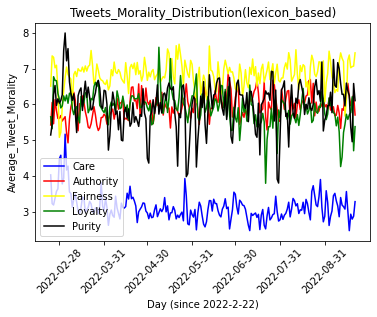

In [207]:
#Draw
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(mtable.index[0],mtable.index[-1],freq='M'),rotation=45)
plt.plot(mtable.index, mtable.avg_care, label='Care', color='blue')
plt.plot(mtable.index, mtable.avg_authority, label='Authority', color='red')
plt.plot(mtable.index, mtable.avg_fairness, label='Fairness', color='yellow')
plt.plot(mtable.index, mtable.avg_loyalty, label='Loyalty', color='green')
plt.plot(mtable.index, mtable.avg_purity, label='Purity', color='black')
plt.ylabel('Average_Tweet_Morality')
plt.xlabel('Day (since 2022-2-22)')
plt.title('Tweets_Morality_Distribution(lexicon_based)')
plt.legend()
plt.savefig('Tweets_Morality_Distribution(lexicon_based).png', dpi=300)
plt.show()

In [208]:
mtable.to_csv('Daily_Morality.csv')

ok！